<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
series = np.sin((0.1*np.arange(400))**2)    #This is a time series of the form: x(t)=sin(ωt2)

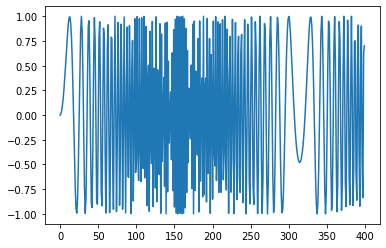

In [0]:
plt.plot(series)
plt.show() 

In [0]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [0]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 34ms/step - loss: 1.1372 - val_loss: 0.8677
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 0.9443 - val_loss: 0.8165
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.8266 - val_loss: 0.7822
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.7385 - val_loss: 0.7410
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6760 - val_loss: 0.7048
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6305 - val_loss: 0.6611
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5909 - val_loss: 0.6351
Epoch 8/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5670 - val_loss: 0.6093
Epoch 9/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5451 - val_loss: 0.5953
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5298 - val_loss: 0.5881
Epoch 11/80
7/7 [=====================

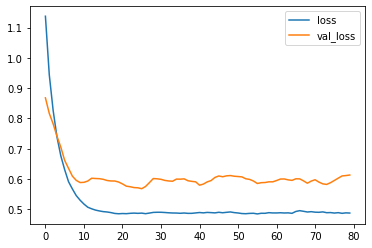

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


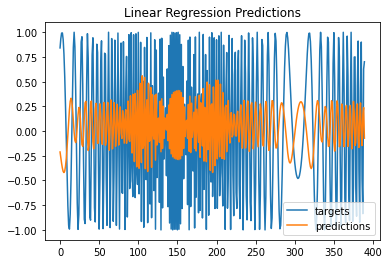

In [0]:
# One-step forecast using true targets
# Even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()
#hag raha yeh

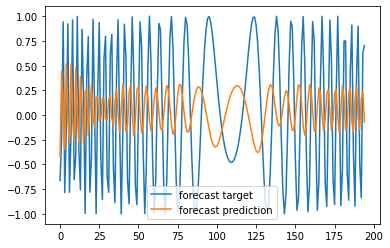

In [0]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

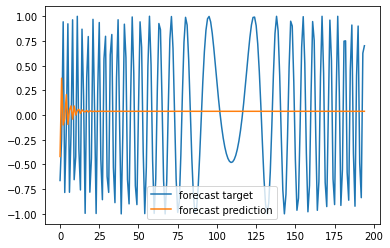

In [0]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

# Now LSTM
SimpleRNN no memory, LSTM/GRU with memory, thus better


In [0]:
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 54ms/step - loss: 0.5179 - val_loss: 0.5251
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4755 - val_loss: 0.5309
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4046 - val_loss: 0.6094
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3370 - val_loss: 0.4192
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1916 - val_loss: 0.3660
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1362 - val_loss: 0.2010
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0817 - val_loss: 0.2108
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0846 - val_loss: 0.1555
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0894 - val_loss: 0.1536
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0391 - val_loss: 0.1737
Epoch 11/200
7/7 [==========

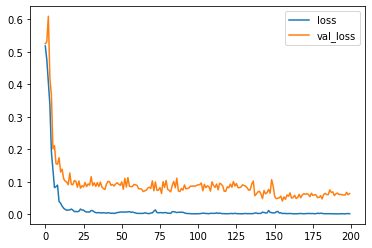

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


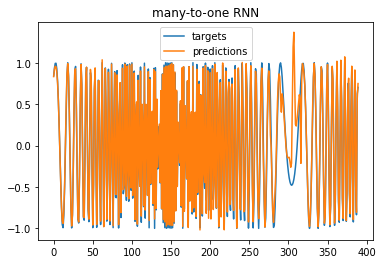

In [0]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

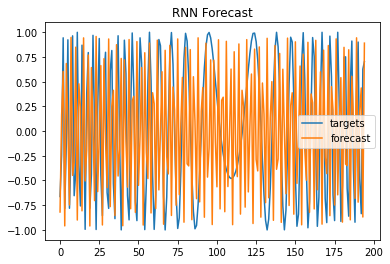

In [0]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()